In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Baseline K-Means Clustering on Error Data

In [2]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
# drop uncomplete rows
df.dropna(inplace=True)

# drop categorical columns
df.drop('encoded_material', axis=1, inplace=True)
df.drop('material', axis=1, inplace=True)

df.describe()

,tdoa12,tdoa21,snr_an1,power_dif_an1,snr_an2,power_dif_an2,an1_rx_snr,an1_rx_powerdif,an1_tof,an2_rx_snr,an2_rx_powerdif,an2_tof,error
count,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000,59871.000000
mean,-0.261550,0.243546,108.807438,13.347087,132.862162,12.379578,203.198468,11.113611,5.044038,194.427478,10.951227,5.043107,-0.094614
std,0.210522,2.164604,50.282204,5.176766,19.046488,1.294191,31.160414,1.289327,0.022116,30.615709,1.200196,0.022047,0.210513
min,-9.580582,-373.351807,6.208333,-17.027435,9.000000,-6.979210,4.407227,-31.256706,4.957510,0.118671,-35.275032,4.952817,-9.413460
25%,-0.314348,0.159520,78.250000,10.623871,120.857140,12.025036,181.545837,10.322666,5.027886,174.125000,10.293266,5.027886,-0.146944
50%,-0.211129,0.211129,119.000000,11.271515,132.392853,12.568062,202.666672,10.793015,5.041961,194.583328,10.737564,5.041961,-0.044637
75%,-0.159520,0.314348,141.142853,14.279049,145.541672,12.895836,227.149994,11.470390,5.060728,217.500000,11.251774,5.056036,0.007467
max,0.286198,4.077143,326.200012,31.497238,214.875000,32.832855,330.000000,15.155426,5.145180,314.875000,36.156631,5.145180,0.453030


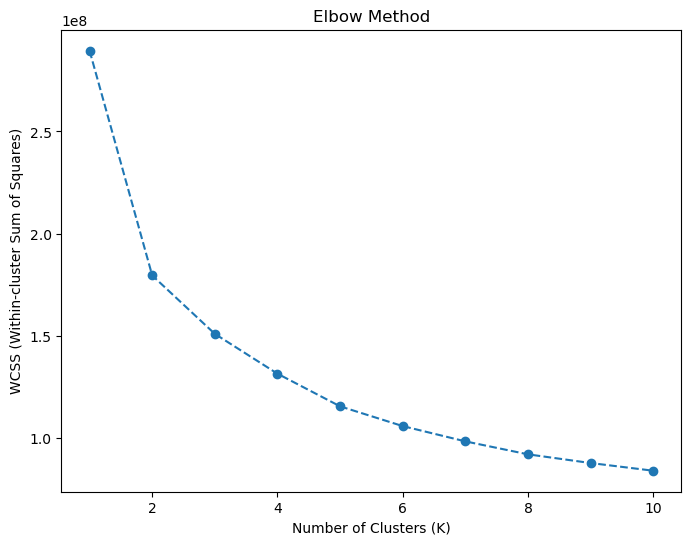

In [4]:
#Using the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.savefig('elbow_method.png')
plt.show()

In [5]:
k = 4  # Set the number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

## trying different k

In [6]:
max_k  = 13

### Within-Cluster Sum of Squares (WCSS):
WCSS measures the variance of data points within each cluster. It quantifies how compact the clusters are. Smaller WCSS values indicate tighter clusters

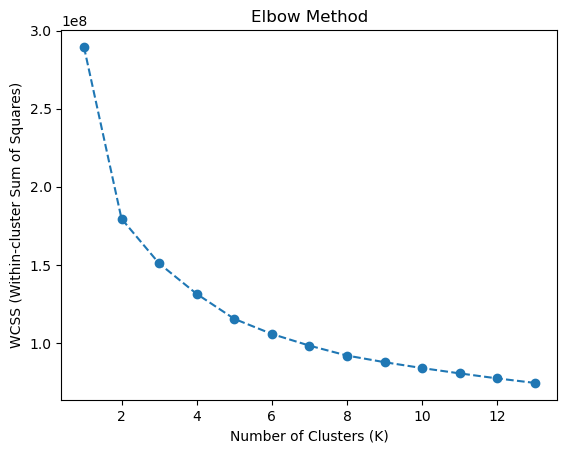

In [7]:
wcss = []
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia is another name for WCSS

# Plot the WCSS values for different K values
plt.plot(range(1, max_k+1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.savefig('WCSS.png')

plt.show()

### Silhouette Score:
The silhouette score measures how similar each data point is to its own cluster compared to other clusters. A higher silhouette score indicates that the data points are well-separated into clusters.

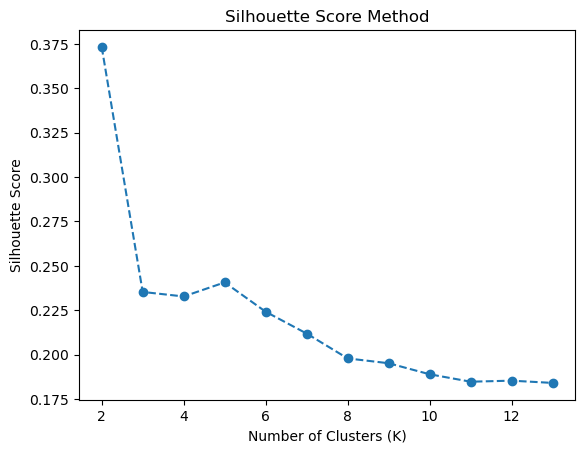

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different K values
plt.plot(range(2, max_k+1), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.savefig('silouette_score.png')
plt.show()

Gap Statistics:
Gap statistics compare the performance of K-Means clustering to that of a random clustering. It helps you assess whether the clustering is significantly better than random.

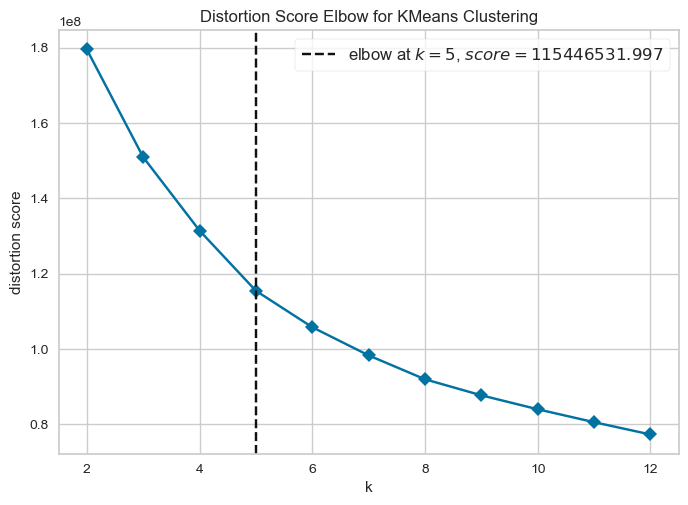

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, max_k), timings=False)
visualizer.fit(df)
visualizer.show(outpath="elbow_plot.png")
visualizer.show()